# Project Description

You have decided to open a small cafe in Los Angeles. Your cafe is quite unique as you employ robots as waiters or servers. While the project shows promise, it requires significant capital. Therefore, you and your partners decide to attract investor interest. They are intrigued by the current market conditions, but can you sustain success as the allure of the robot begins to fade?

As an expert analyst, your partners ask you to prepare market research. You have data from open sources related to the types of dining establishments in LA.

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data dan Prepare for Analysis

In [2]:
data = pd.read_csv('rest_data_us.csv')
data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


From the information in the data above, we observe that the number of rows for "chain" is different from the other columns. Let's check whether there are any duplicates or not.

In [4]:
data = pd.read_csv('rest_data_us.csv')
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.8+ KB


In [5]:
data[data['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


There are only 3 data points with "NaN" in the chain column, and we can remove those entries.

In [6]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


### Clean Data

In [7]:
data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


## Data Analysis

### Examine the proportions of various types of businesses. Create a graph.

Make th dataset first.

In [8]:
type_proportion = data.groupby('object_type').agg({'object_name':'count'}).reset_index()
type_proportion.columns = ['business_type','total']
type_proportion = type_proportion.sort_values('total',ascending = False)
type_proportion

,business_type,total
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292
0,Bakery,283


<AxesSubplot:xlabel='business_type', ylabel='total'>

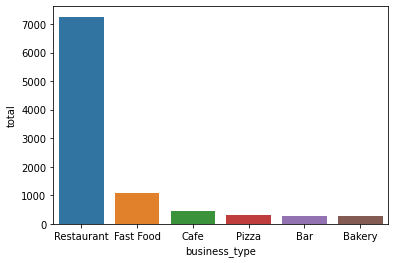

In [9]:
sns.barplot(x='business_type', y='total', data=type_proportion)

From the data above, we can see that the restaurant category has the highest proportion compared to other businesses.

### Examine the proportions of franchise-based and non-franchise businesses. Create a graph. Also, which type of business is usually a franchise?

In [10]:
type_proportion_chain = data.groupby(['object_type','chain']).agg({'object_name':'count'}).reset_index()
type_proportion_chain.columns = ['business_type','total_chain','total']
type_proportion_chain = type_proportion_chain.sort_values('total',ascending = False)
type_proportion_chain

,business_type,total_chain,total
9,Restaurant,False,4961
10,Restaurant,True,2292
6,Fast Food,True,605
5,Fast Food,False,461
0,Bakery,True,283
4,Cafe,True,266
1,Bar,False,215
3,Cafe,False,169
7,Pizza,False,166
8,Pizza,True,153


<AxesSubplot:xlabel='business_type', ylabel='total'>

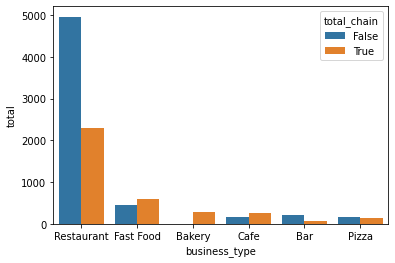

In [11]:
sns.barplot(x='business_type', y='total', hue = 'total_chain', data=type_proportion_chain)

From the graph above, it is evident that the restaurant business remains a favorite, but there are more non-franchise businesses than franchises. So, the "Restaurant" type is the most common type that is franchise-based.

### Looking for Characteristics of Franchise-Based Businesses and the Average Number of Seats.

In [12]:
data_chain = data.groupby(['chain']).agg({'object_name':'count','number':'sum'}).reset_index()
data_chain['ratio_chair_unit'] = data_chain['number'] / data_chain['object_name']
data_chain

,chain,object_name,number,ratio_chair_unit
0,False,5972,275736,46.171467
1,True,3676,145916,39.694233


Now, let's examine the distribution of seats and the number of business types. We need to create a pivot table or group.

In [13]:
data_chain_true = data.groupby(['object_type']).agg({'object_name':'count','number':'sum'}).reset_index()
data_chain_true['ratio_chair_unit'] = data_chain_true['number'] / data_chain_true['object_name']
data_chain_true.sort_values('ratio_chair_unit', ascending = False)

,object_type,object_name,number,ratio_chair_unit
5,Restaurant,7253,348498,48.048807
1,Bar,292,13072,44.767123
3,Fast Food,1066,33939,31.837711
4,Pizza,319,9106,28.545455
2,Cafe,435,10875,25.000000
0,Bakery,283,6162,21.773852


In [14]:
chair_dist = data[data['chain'] == True]
chair_dist_01 = data[data['chain'] == False]

In [15]:
chair_dist = chair_dist.groupby('number').agg({'object_name':'count'})
chair_dist_01 = chair_dist_01.groupby('number').agg({'object_name':'count'})

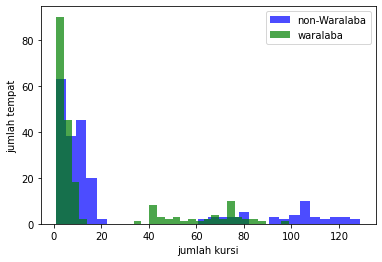

In [16]:
plt.hist(chair_dist_01, bins=30, color='blue', alpha=0.7, label='non-Waralaba')

plt.hist(chair_dist, bins=30, color='green', alpha=0.7, label='waralaba')

plt.xlabel('jumlah kursi')
plt.ylabel('jumlah tempat')
plt.legend()

plt.show()

From the two histograms above, chair_dist represents the seat distribution for franchises, and chair_dist_01 represents the seat distribution for non-franchises. It can be tentatively concluded that franchise-based businesses tend to have fewer seats and more locations.

For the average number of seats, we can refer to the dataset data_true_chain.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='object_type', ylabel='ratio_chair_unit'>

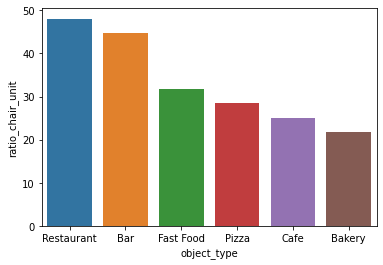

In [17]:
data_chain_true = data_chain_true.sort_values('ratio_chair_unit', ascending = False)

sns.barplot(data_chain_true['object_type'] , data_chain_true['ratio_chair_unit'])


We can see that the highest average is owned by restaurants with the most seats, indicating that dining is a primary need, and the population in those places is generally high.

### Let's move the street name data from the address column to a separate column.

In [18]:
data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [19]:
data['address_without_number'] = data['address'].str.replace(r'[^a-zA-Z\s]', '')
data

/tmp/ipykernel_172/3856248467.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['address_without_number'] = data['address'].str.replace(r'[^a-zA-Z\s]', '')


,id,object_name,address,chain,object_type,number,address_without_number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE


### Create a chart displaying the top ten street names based on the number of businesses (restaurants).

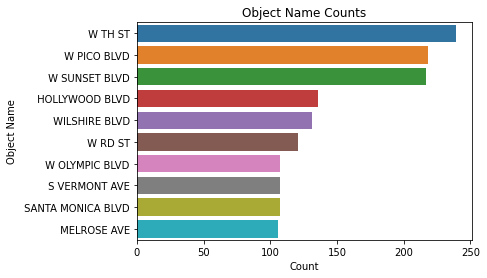

In [20]:
data_rest = data[data['object_type'] == 'Restaurant']

data_name = data_rest.groupby('address_without_number').agg({'object_name':'count'}).reset_index()
data_name = data_name.sort_values('object_name',ascending = False)
data_top_name = data_name.head(10)

sns.barplot(x='object_name', y='address_without_number', data=data_top_name)

plt.xlabel('Count')
plt.ylabel('Object Name')
plt.title('Object Name Counts')

plt.show()

From the graph above, we can identify the top 10 street names based on the number of restaurant businesses. The street name "W TH ST" has the highest number of restaurant businesses, followed by "W Pico BLVD" and "W SUNSET BLVD."

### Find the number of streets that only have one business (restaurant).

Currently, we are looking for street names that have only one type of restaurant business.

In [21]:
data_name

,address_without_number,object_name
1316,W TH ST,239
1251,W PICO BLVD,218
1291,W SUNSET BLVD,217
347,HOLLYWOOD BLVD,136
1410,WILSHIRE BLVD,131
...,...,...
631,NORWALK BLVD,1
633,OLYMPIC BLVD,1
635,OLYMPIC BLVD UNIT B,1
637,ORD ST A,1


In [22]:
data_top_name_rest_1 = data_name[data_name['object_name'] == 1]
data_top_name_rest_1

,address_without_number,object_name
924,S REDONDO BLVD,1
927,S ROBERTSON BLVD A,1
928,S ROBERTSON BLVD STE,1
952,S SAWTELLE BLVD,1
1072,SAWTELLE BLVD,1
...,...,...
631,NORWALK BLVD,1
633,OLYMPIC BLVD,1
635,OLYMPIC BLVD UNIT B,1
637,ORD ST A,1


### Create a distribution of the number of seats for streets with many businesses (restaurants).

In [23]:
data_rest_top_chair = data_rest.groupby('address_without_number').agg({'object_name':'count','number':'sum'}).reset_index()
data_rest_top_chair = data_rest_top_chair.sort_values('object_name', ascending = False ).head(100)
data_rest_top_chair

,address_without_number,object_name,number
1316,W TH ST,239,13306
1251,W PICO BLVD,218,9857
1291,W SUNSET BLVD,217,12088
347,HOLLYWOOD BLVD,136,7948
1410,WILSHIRE BLVD,131,8786
...,...,...,...
365,HYPERION AVE,15,659
263,E TH ST,15,210
686,S ALAMEDA ST STE,15,880
499,N EASTERN AVE,15,436


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


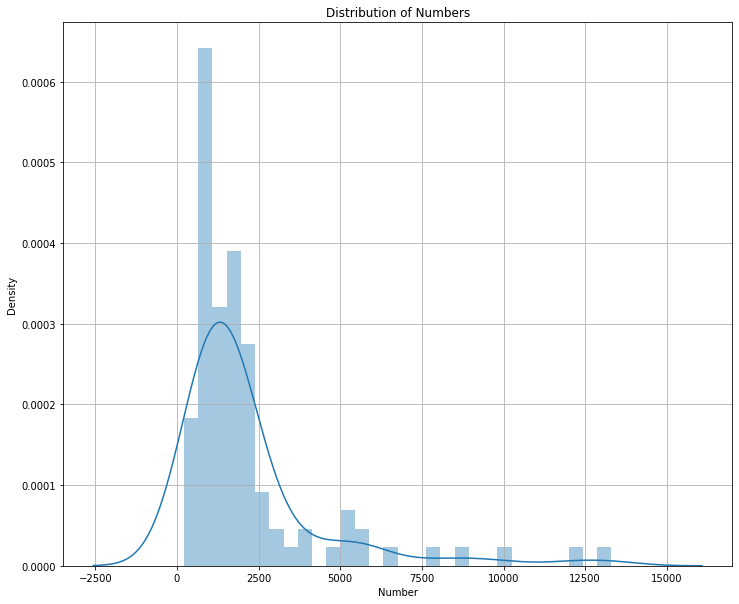

In [24]:
plt.figure(figsize=(12, 10))
sns.distplot(data_rest_top_chair['number'], bins=30)
plt.xlabel("Number")
plt.title("Distribution of Numbers")
plt.grid(True)
plt.show()


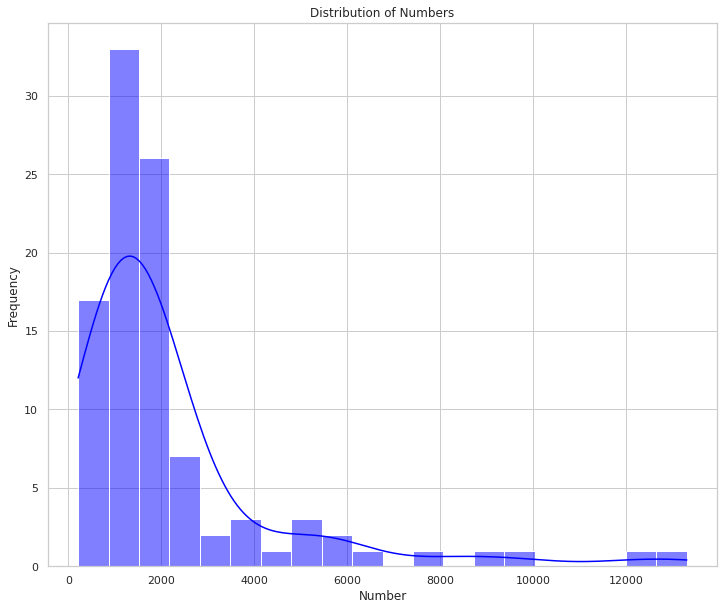

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
sns.histplot(data_rest_top_chair["number"], bins=20, kde=True, color="blue")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Distribution of Numbers")
plt.grid(True)
plt.show()


From the distribution above, we can see the distribution of seats for restaurants located on streets with many businesses, around 1000 - 2000 seats.

# General Conclusion

If we look at what we want to do, which is to open a cafe, from the data we obtained from the type_proportion dataset, cafes are indeed ranked third, with a percentage of around 4-5% of the total business. It's relatively small, and in the cafe category, franchises are more common than non-franchises. My conclusion here is that there isn't much innovation in the cafe sector, but if we want to invest in cafes, the risk is quite significant even though there is room for innovation.

From the data we have, the business type with more significant potential than cafes is restaurants, with the highest quantity compared to other types. This implies substantial potential, and on average, if you want to open a restaurant, it should have around 48 seats. Further exploration of this data is necessary to focus on specific streets for restaurant development.
